In [1]:
from functools import reduce
import operator
import networkx as nx
from networkx.algorithms import bipartite
from IPython.display import display

import sympy
import scipy
import numpy as np
pi = sympy.pi
x, y, z = sympy.symbols('x y z')
n = sympy.Symbol('n', positive=True, integer=True)
sympy.init_printing(use_unicode=True)

In [83]:
# 11.1, 12
a_0 = 1/(2*pi) * (sympy.integrate(-x, (x, -pi, 0)) + sympy.integrate(x, (x, 0, pi)))
display(a_0)
print("a_n")
a_n = 1/pi * (sympy.integrate(-x * sympy.cos(n*x), (x, -pi, 0)) + sympy.integrate(x * sympy.cos(n*x), (x, 0, pi)))
for i in range(1,6):
    display(a_n.subs({n: i}))

print("b_n")
b_n = 1/pi * (sympy.integrate(-x * sympy.sin(n*x), (x, -pi, 0)) + sympy.integrate(x * sympy.sin(n*x), (x, 0, pi)))
for i in range(1,6):
    display(b_n.subs({n: i}))

sympy.fourier_series(sympy.Abs(x), (x, -pi, pi)).truncate(n=5)

a_n


b_n


a_n


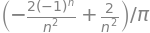

b_n


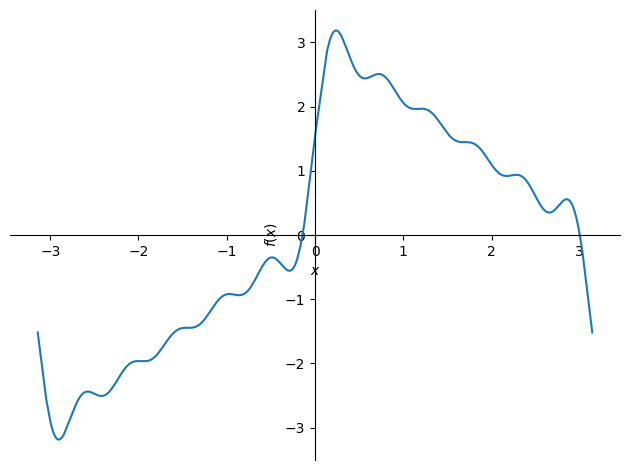

In [99]:
# 11.1, 13
fx = x
gx = pi - x
p = sympy.Piecewise((gx, x >= 0), (fx, x < 0))
lim = (x, -pi, pi)
a_0 = 1/(2*pi) * sympy.integrate(p, lim)
display(a_0)
print("a_n")
a_n = 1/pi * sympy.integrate(p * sympy.cos(n*x), lim)
display(a_n)
for i in range(1,6):
    display(a_n.subs({n: i}))

print("b_n")
b_n = 1/pi * sympy.integrate(p * sympy.sin(n*x), lim)
for i in range(1,6):
    display(b_n.subs({n: i}))

s = sympy.fourier_series(p, lim).truncate(n=6)
p = sympy.plot(s, lim, show=False)
p.show()

In [ ]:
# 11.1, 14
fx = x**2
lim = (x, -pi, pi)
a_0 = 1/(2*pi) * sympy.integrate(fx, lim)
display(a_0)
print("a_n")
a_n = 1/pi * sympy.integrate(fx * sympy.cos(n*x), lim)
display(a_n)
for i in range(1,6):
    display(a_n.subs({n: i}))

print("b_n")
b_n = 1/pi * sympy.integrate(fx * sympy.sin(n*x), lim)
for i in range(1,6):
    display(b_n.subs({n: i}))

sympy.fourier_series(fx, lim).truncate(n=6)

a_n


b_n


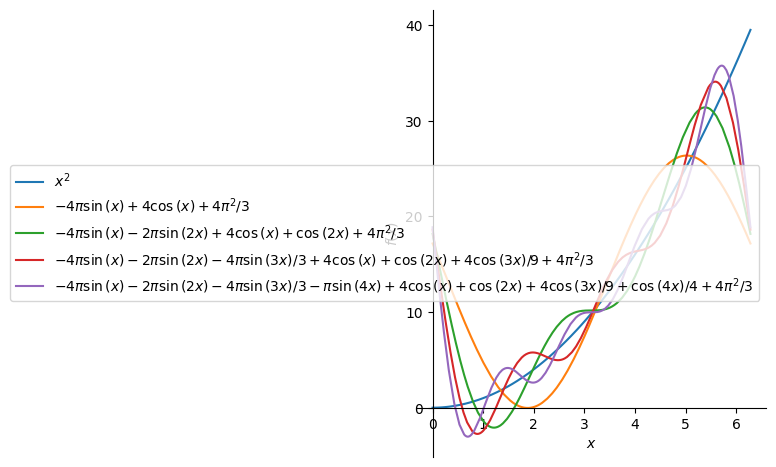

In [72]:
# 11.1, 15
fx = x**2
lim = (x, 0, 2*pi)
a_0 = 1/(2*pi) * sympy.integrate(fx, lim)
display(a_0)
print("a_n")
a_n = 1/pi * sympy.integrate(fx * sympy.cos(n*x), lim)
display(a_n)
for i in range(1,6):
    display(a_n.subs({n: i}))

print("b_n")
b_n = 1/pi * sympy.integrate(fx * sympy.sin(n*x), lim)
display(b_n)
for i in range(1,6):
    display(b_n.subs({n: i}))

s = sympy.fourier_series(fx, lim)
s2 = s.truncate(n=2)
s3 = s.truncate(n=3)
s4 = s.truncate(n=4)
s5 = s.truncate(n=5)
p = sympy.plot(x**2, s2, s3, s4, s5, lim, show=False, legend=True)
p.show()

a_n


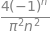

b_n


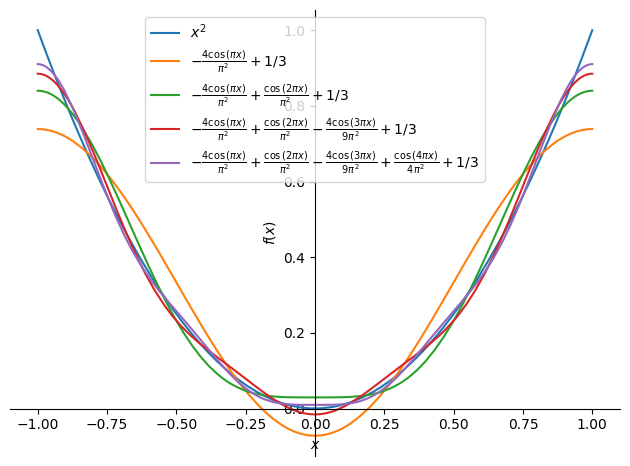

In [3]:
# 11.2, 11
fx = x**2
lim = (x, -1, 1)
per = 2
L = sympy.Rational(per, 2)
a_0 = 1/(2*L) * sympy.integrate(fx, lim)
display(a_0)
print("a_n")
a_n = 1/L * sympy.integrate(fx * sympy.cos(n*pi*x/L), lim)
display(a_n)
for i in range(1,6):
    display(a_n.subs({n: i}))

print("b_n")
b_n = 1/L * sympy.integrate(fx * sympy.sin(n*pi*x/L), lim)
display(b_n)
for i in range(1,6):
    display(b_n.subs({n: i}))

s = sympy.fourier_series(fx, lim)
s2 = s.truncate(n=2)
s3 = s.truncate(n=3)
s4 = s.truncate(n=4)
s5 = s.truncate(n=5)
p = sympy.plot(x**2, s2, s3, s4, s5, lim, show=False, legend=True)
p.show()

In [19]:
# symbolic version, find e-star

def fourier_estar_symbolic(f, t, lim):
    a_0 = 1/(2*pi) * sympy.integrate(f, lim)
    a_n = lambda n: 1/pi * sympy.integrate(f * sympy.cos(n * x), lim)
    b_n = lambda n: 1/pi * sympy.integrate(f * sympy.sin(n * x), lim)
    a_sum = lambda n: reduce(operator.add, map(lambda v: a_n(v)**2, range(1, n+1)), 0)
    b_sum = lambda n: reduce(operator.add, map(lambda v: b_n(v)**2, range(1, n+1)), 0)
    int_sq = sympy.integrate(f**2, lim)
    return int_sq - pi*(2*a_0**2 + a_sum(t) + b_sum(t))

p = sympy.Piecewise((1, x >= 0), (-1, x < 0))
lim = (x, -pi, pi)

for t in range(1, 6):
    print(sympy.N(fourier_estar_symbolic(p, t, lim)))
    # display(fourier_estar_symbolic(p, t, lim))

sympy.fourier_series(p, lim).truncate(5)
# s = sympy.fourier_series(f, lim)
# s1 = s.truncate(n = 1)
# s2 = s.truncate(n = 2)
# s3 = s.truncate(n = 3)
# display(s1)
# display(s2)
# print(sympy.latex(s3))
# s3


1.19022712823894
1.19022712823894
0.624342886134419
0.624342886134419
0.420624558976793


In [20]:
import numpy as np
import scipy.integrate as integrate

def fourier_estar(f, t):
    a_0 = 1/(2*np.pi) * integrate.quad(f, -np.pi, np.pi)[0]
    a_n = lambda n: 1/np.pi * integrate.quad(lambda x: f(x) * np.cos(n * x), -np.pi, np.pi)[0]
    b_n = lambda n: 1/np.pi * integrate.quad(lambda x: f(x) * np.sin(n * x), -np.pi, np.pi)[0]
    a_sum = lambda n: reduce(operator.add, map(lambda v: a_n(v)**2, range(1, n+1)), 0)
    b_sum = lambda n: reduce(operator.add, map(lambda v: b_n(v)**2, range(1, n+1)), 0)
    int_sq = integrate.quad(lambda x: np.power(f(x), 2), -np.pi, np.pi)[0]
    return int_sq - np.pi*(2*a_0**2 + a_sum(t) + b_sum(t))

f = lambda x: 1 if x >= 0 else -1
# f = lambda x: x+np.pi
print('    N E*')
for t in range(1, 11):
    print(f'{t:5} {fourier_estar(f, t):.4f}')
print(f'{100:5} {fourier_estar(f, 100):.4f}')

    N E*
    1 1.1902
    2 1.1902
    3 0.6243
    4 0.6243
    5 0.4206
    6 0.4206
    7 0.3167
    8 0.3167
    9 0.2538
   10 0.2538
  100 0.0255


/tmp/ipykernel_1891264/677426063.py:6: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  a_n = lambda n: 1/np.pi * integrate.quad(lambda x: f(x) * np.cos(n * x), -np.pi, np.pi)[0]
/tmp/ipykernel_1891264/677426063.py:7: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the i